# 言語処理100本ノック

#### https://nlp100.github.io/ja/

## 第4章: 形態素解析

##### 夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

##### なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [1]:
#Mecabインストール
"""
! sudo yum update
! sudo yum install gcc make glibc gcc-c++ python-devel
! wget -O mecab-0.996.tar.gz 'https://drive.google.com/uc?export=download&id=0B4y35FiV1wh7cENtOXlicTFaRUE'
! tar xvzf mecab-0.996.tar.gz
! cd mecab-0.996
! ./configure
! make
! make check
! sudo make install
! cd ../
"""
# 4.MeCab 等で使用する辞書(IPADIC)をインストール
"""
$ wget -O mecab-ipadic-2.7.0-20070801.tar.gz 'https://drive.google.com/uc?export=download&id=0B4y35FiV1wh7MWVlSDBCSXZMTXM'
$ tar xvzf mecab-ipadic-2.7.0-20070801.tar.gz
$ cd mecab-ipadic-2.7.0-20070801
$ ./configure -with-charset=utf-8 –enable-utf8-only
$ make
$ sudo make install
$ cd ../

"""
#　Anacondaで使えるようにバインド
"""
conda install -c anaconda swig
pip install mecab-python3
"""


'\nconda install -c anaconda swig\npip install mecab-python3\n'

In [2]:
# ライブラリインポート
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import json
import re
import pprint

import matplotlib

import MeCab

### 30. 形態素解析結果の読み込み
##### 形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [3]:
# MeCabの結果フォーマット
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

#MeCab実行
!mecab ./data/4/neko.txt >./data/4/neko.txt.middle
!head ./data/4/neko.txt.middle -n 10000 >./data/4/neko.txt.middle_part

#辞書型へ編集
sentence = []
sentences = []

with open('./data/4/neko.txt.middle_part','r') as fr:
    #一行ずつ読み込み
    for mecab_str in fr.read().split('\n'):
        #print(mecab_str)

        #タブで区切り
        mecab_surface = mecab_str.split('\t')
        #print(mecab_surface)

        if len(mecab_surface) > 1 :
            mecab_list = mecab_surface[1].split(',')

            word_dict = {
                'surface' : mecab_surface[0],
                'base' : mecab_list[6],
                'pos' : mecab_list[0],
                'pos1' : mecab_list[1]
            }
            sentence.append(word_dict)
        else:
            sentences.append(sentence)
            sentence=[]
            
print(str(len(sentences)))
with open('./data/4/neko.txt.mecab_part','w') as fw:
    fw.write(str(sentences))

452


### 31. 動詞
##### 動詞の表層形をすべて抽出せよ．．

In [4]:
surface = []
for sentnese in sentences:
    for morphene in sentnese:
        if morphene['pos'] == '動詞':
            surface.append(morphene['surface'])

['生れ',
 'つか',
 'し',
 '泣い',
 'し',
 'いる',
 '始め',
 '見',
 '聞く',
 '捕え',
 '煮',
 '食う',
 '思わ',
 '載せ',
 'られ',
 '持ち上げ',
 'られ',
 'し',
 'あっ',
 '落ちつい',
 '見',
 '見',
 '思っ',
 '残っ',
 'いる',
 'さ',
 'れ',
 'し',
 '逢っ',
 '出会わ',
 'し',
 'のみ',
 'なら',
 'し',
 'いる',
 '吹く',
 'せ',
 '弱っ',
 '飲む',
 '知っ',
 '坐っ',
 'おっ',
 'する',
 'し',
 '始め',
 '動く',
 '動く',
 '分ら',
 '廻る',
 'なる',
 '助から',
 '思っ',
 'いる',
 'さり',
 'し',
 '出',
 'し',
 'いる',
 '考え出そ',
 '分ら',
 '付い',
 '見る',
 'い',
 'おっ',
 '見え',
 '隠し',
 'しまっ',
 '違っ',
 '明い',
 'い',
 'られ',
 '這い出し',
 '見る',
 '棄て',
 'られ',
 '這い出す',
 'ある',
 '坐っ',
 'し',
 '考え',
 '見',
 '出',
 'し',
 '泣い',
 '来',
 'くれる',
 '考え付い',
 'やっ',
 '見',
 '来',
 '渡っ',
 'かかる',
 '減っ',
 '来',
 '泣き',
 '出',
 'ある',
 'ある',
 'し',
 'そろ',
 '廻り',
 '始め',
 'し',
 '這っ',
 '行く',
 '出',
 '這入っ',
 'なる',
 '思っ',
 '崩れ',
 'もぐり込ん',
 '破れ',
 'い',
 'し',
 '知れ',
 '云っ',
 '至る',
 'する',
 'なっ',
 'いる',
 '忍び込ん',
 '分ら',
 'なる',
 '減る',
 '降っ',
 '来る',
 '出来',
 'なっ',
 'あるい',
 '行く',
 '考える',
 '這入っ',
 'おっ',
 '見る',
 'し',
 '逢っ',
 '見る',
 'つかん',
 '抛り出し',
 '思っ',
 'ねぶっ',
 '任せ',
 'い',
 '出来

### 32. 動詞の原形
##### 動詞の原形をすべて抽出せよ．

In [33]:
base = []
for sentence in sentences:
    for morphene in sentence:
        if morphene['pos'] == '動詞':
            base.append(morphene['base'])


### 33. 「AのB」
##### 2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [32]:
anob=[]
for sentence in sentences:
    if len(sentence)>3:
        for i in range(1,len(sentence)-1):
            if (sentence[i]['surface']=='の') & (sentence[i-1]['pos']=='名詞') & (sentence[i+1]['pos']=='名詞'):
                #print(sentence[i-1])
                anob.append(sentence[i-1]['surface']+sentence[i]['surface']+sentence[i+1]['surface'])


### 34. 名詞の連接
##### 名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [31]:
naun_series=[]
for sentence in sentences:
    if len(sentence)>2:
        j=0
        naun_str=''
        for i in range(0,len(sentence)-1):
            if (sentence[i]['pos']=='名詞')&(sentence[i+1]['pos']=='名詞'):
                naun_str=naun_str+sentence[i]['surface']
                #print(naun_str)
                j=j+1
            elif (j>0):
                naun_str=naun_str+sentence[i]['surface']
                naun_series.append(naun_str)
                naun_str=''
                j=0


### 35. 単語の出現頻度
##### 文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [37]:
import collections

term=[]
for sentence in sentences:
    for i in range(0,len(sentence)):
        term.append(sentence[i]['surface'])
        #print(sentence[i]['surface'])

c = collections.Counter(term)
c = sorted(c.items(), key=lambda x:x[1],reverse=True)


### 36. 頻度上位10語
##### 出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．．

In [34]:
#matplotlibの文字設定
if(True):

    matplotlib.matplotlib_fname()

    !wget https://ipafont.ipa.go.jp/IPAexfont/ipaexg00401.zip
    !unzip ipaexg00401.zip

    !cp ./ipaexg00401/ipaexg.ttf /home/ec2-user/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/ipaexg.ttf

    #フォントキャッシュの削除
    matplotlib.get_configdir()

    !sudo yum install -y ipa-gothic-fonts

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.font_manager._rebuild() #キャッシュの削除
plt.rcParams['font.family'] = 'IPAexGothic' # インストールしたフォントを指定

--2020-05-11 08:57:35--  https://ipafont.ipa.go.jp/IPAexfont/ipaexg00401.zip
Resolving ipafont.ipa.go.jp (ipafont.ipa.go.jp)... 192.218.88.244
Connecting to ipafont.ipa.go.jp (ipafont.ipa.go.jp)|192.218.88.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4166255 (4.0M) [application/zip]
Saving to: ‘ipaexg00401.zip.1’

100%[======================================>] 4,166,255   10.2MB/s   in 0.4s   

2020-05-11 08:57:35 (10.2 MB/s) - ‘ipaexg00401.zip.1’ saved [4166255/4166255]

Archive:  ipaexg00401.zip
replace ipaexg00401/ipaexg.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
Loaded plugins: extras_suggestions, langpacks, priorities, update-motd
amzn2-core                                               | 2.4 kB     00:00     
amzn2extra-docker                                        | 1.8 kB     00:00     
Package ipa-gothic-fonts-003.03-5.amzn2.noarch already installed and latest version
Nothing to do


<BarContainer object of 10 artists>

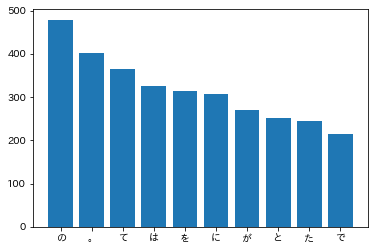

In [38]:
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties
%matplotlib inline

c_10=c[0:10]

list_zipped = list(zip(*c_10))

words = list_zipped[0]
counts = list_zipped[1]

plt.bar(words, counts) 


### 37. 「猫」と共起頻度の高い上位10語
##### 「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

<BarContainer object of 10 artists>

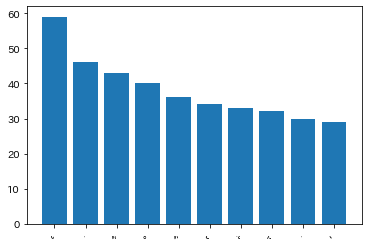

In [39]:
import collections
import ast
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties
%matplotlib inline


Co_occurrence=[]

for sentence in sentences:
    
    str_sentence= ','.join(map(str,sentence))
    #print(str_sentence)
    
    if "猫" in str_sentence:
        #print(sentence)
        for i in range(0,len(sentence)):
            if sentence[i]['surface']!="猫":
                Co_occurrence.append(sentence[i]['surface'])
                #print(sentence[i]['surface'])

c = collections.Counter(Co_occurrence)
c = sorted(c.items(), key=lambda x:x[1],reverse=True)

c_10=c[0:10]

list_zipped = list(zip(*c_10))

words = list_zipped[0]
counts = list_zipped[1]

plt.bar(words, counts) 


### 38. ヒストグラム
##### 単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

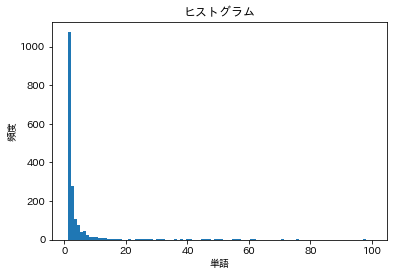

In [45]:
from collections import Counter
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties
%matplotlib inline

words = [
    dct['base']
    for sentence in sentences
    for dct in sentence
]
cnt = Counter(words).most_common()

freqs = [freq for _, freq in cnt]


plt.title('ヒストグラム')
plt.xlabel('単語')
plt.ylabel('頻度')
plt.hist(freqs, bins=100, range=(1,100))
plt.show()

### 39. Zipfの法則
##### 単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

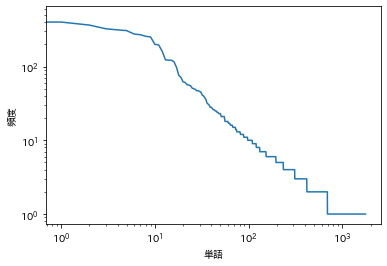

In [50]:
from collections import Counter
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties
%matplotlib inline

words = [
    dct['base']
    for sentence in sentences
    for dct in sentence
]
cnt = Counter(words).most_common()

freqs = [freq for _, freq in cnt]

ax = plt.gca()
ax.set_yscale('log')  # y軸をlogスケールで描く
ax.set_xscale('log')  # x軸をlogスケールで描く


plt.xlabel('単語')
plt.ylabel('頻度')
plt.plot(range(len(freqs)),freqs)
plt.show()